<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Model       15 non-null     object 
 1   Quant       15 non-null     object 
 2   Context     15 non-null     int64  
 3   Perplexity  15 non-null     object 
 4   Size_GB     15 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 732.0+ bytes


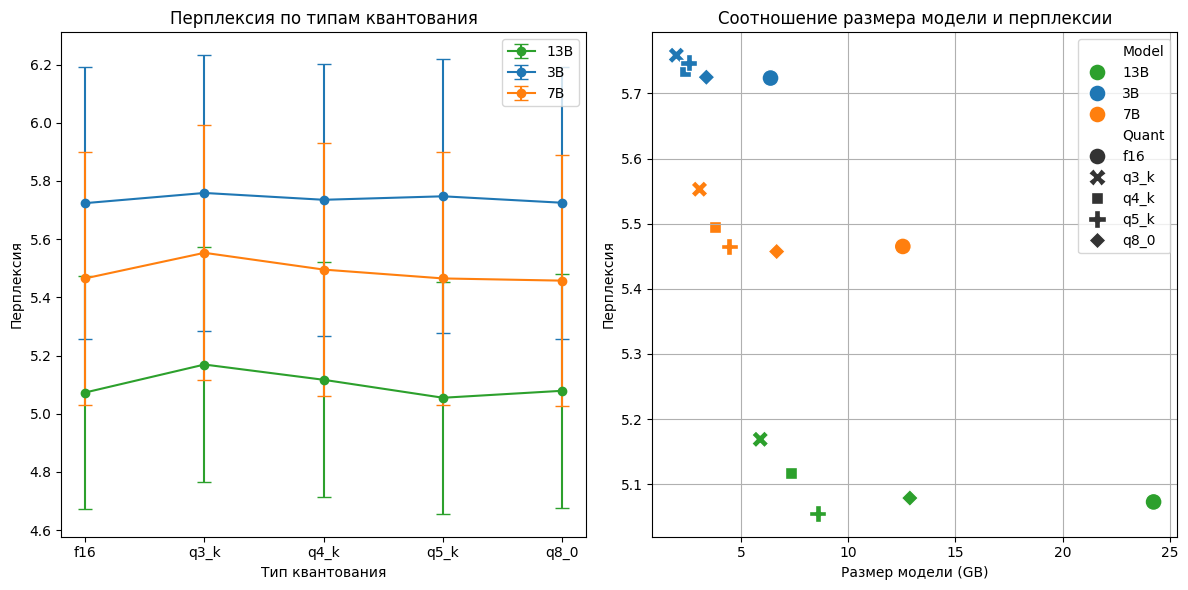

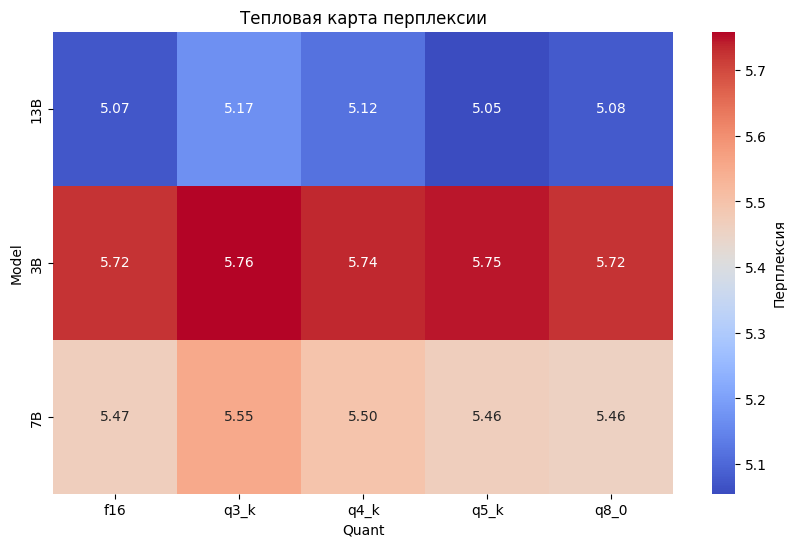

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных

content = """Model;Quant;Context;Perplexity;Size_GB
13B;f16;256;5.0728 +/- 0.40156;24.245435506105423
13B;q3_k;256;5.1690 +/- 0.40510;5.902539998292923
13B;q4_k;256;5.1165 +/- 0.40442;7.325774937868118
13B;q5_k;256;5.0548 +/- 0.39835;8.596069127321243
13B;q8_0;256;5.0788 +/- 0.40222;12.881452351808548
3B;f16;256;5.7237 +/- 0.46791;6.383339822292328
3B;q3_k;256;5.7587 +/- 0.47326;1.9924444556236267
3B;q4_k;256;5.7352 +/- 0.46775;2.402941644191742
3B;q5_k;256;5.7472 +/- 0.47020;2.567748486995697
3B;q8_0;256;5.7250 +/- 0.46798;3.3917827010154724
7B;f16;256;5.4651 +/- 0.43356;12.552495568990707
7B;q3_k;256;5.5530 +/- 0.43855;3.0715385377407074
7B;q4_k;256;5.4953 +/- 0.43581;3.8007636964321136
7B;q5_k;256;5.4649 +/- 0.43397;4.454694360494614
7B;q8_0;256;5.4573 +/- 0.43232;6.669316858053207
"""

from io import StringIO
df = pd.read_csv(StringIO(content), sep=';')

df.info()

# Обработка колонки Perplexity
df[['Perplexity_mean', 'Perplexity_std']] = (
    df['Perplexity']
    .str.split(r'\+\/-', regex=True, expand=True)  # Экранирование символов
    .astype(float)
)
df = df.drop('Perplexity', axis=1)

# Настройка стиля
colors = {'3B': '#1f77b4', '7B': '#ff7f0e', '13B': '#2ca02c'}
plt.figure(figsize=(12, 6))

# График 1: Сравнение перплексии по моделям и квантам
plt.subplot(1, 2, 1)
for model in df.Model.unique():
    subset = df[df.Model == model]
    plt.errorbar(subset.Quant, subset.Perplexity_mean, yerr=subset.Perplexity_std,
                 fmt='-o', label=model, color=colors[model], capsize=5)
plt.title('Перплексия по типам квантования')
plt.xlabel('Тип квантования')
plt.ylabel('Перплексия')
plt.legend()

# График 2: Трейд-офф размер/перплексия
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Size_GB', y='Perplexity_mean', hue='Model',
                style='Quant', s=150, palette=colors)
plt.title('Соотношение размера модели и перплексии')
plt.xlabel('Размер модели (GB)')
plt.ylabel('Перплексия')
plt.grid(True)

plt.tight_layout()
plt.show()

# График 3: Heatmap перплексии
plt.figure(figsize=(10, 6))
pivot_table = df.pivot(index='Model', columns='Quant', values='Perplexity_mean')
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Перплексия'})
plt.title('Тепловая карта перплексии')
plt.show()